# Code for Geothermal module (MIT, Earth Resources Lab course 12.S590)
## Notebook 1: microscopic origin of thermal-elastic properties
<br>
Ben Holtzman, ERL, MIT <br>
<br>
The aim of this notebook is to walk through a fairly simple background path to understanding thermodynamics of solids relevant to estimating the available energy in a geothermal reservoir. 

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
import pandas as pd

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\e'
/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/4152849506.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('Interatomic Distance ($r/\sigma$)')
/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/4152849506.py:25: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('Potential Energy ($u/\epsilon$)')


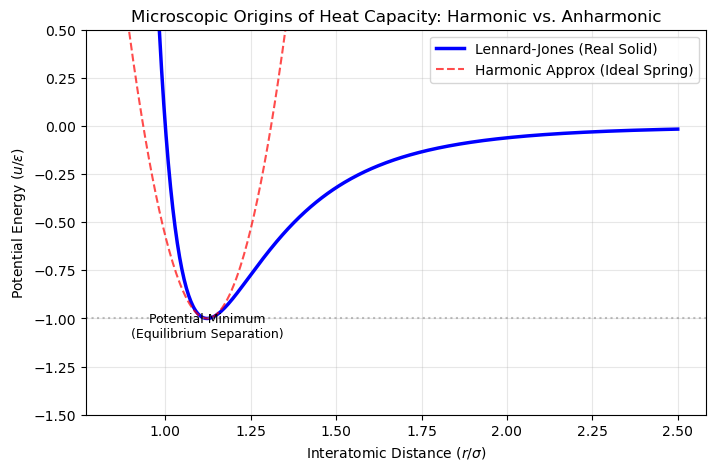

In [59]:


# Define parameters
sigma = 1.0
epsilon = 1.0
r = np.linspace(0.85, 2.5, 500)

# Lennard-Jones Potential
u_lj = 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Harmonic Approximation (Parabola fitting the bottom of the well)
# The minimum is at r_min = 2^(1/6) * sigma approx 1.122
r_min = 2**(1/6) * sigma
k = 72 * epsilon / (2**(1/3) * sigma**2) # curvature at minimum
u_harmonic = -epsilon + 0.5 * k * (r - r_min)**2

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(r, u_lj, label='Lennard-Jones (Real Solid)', color='blue', linewidth=2.5)
plt.plot(r, u_harmonic, label='Harmonic Approx (Ideal Spring)', color='red', linestyle='--', alpha=0.7)

# Annotations for educational value
plt.axhline(-epsilon, color='gray', linestyle=':', alpha=0.5)
plt.text(r_min, -epsilon - 0.1, 'Potential Minimum\n(Equilibrium Separation)', ha='center', fontsize=9)
plt.title('Microscopic Origins of Heat Capacity: Harmonic vs. Anharmonic')
plt.xlabel('Interatomic Distance ($r/\sigma$)')
plt.ylabel('Potential Energy ($u/\epsilon$)')
plt.ylim(-1.5, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot
plt.savefig('LJ_potential_heat_capacity.png')

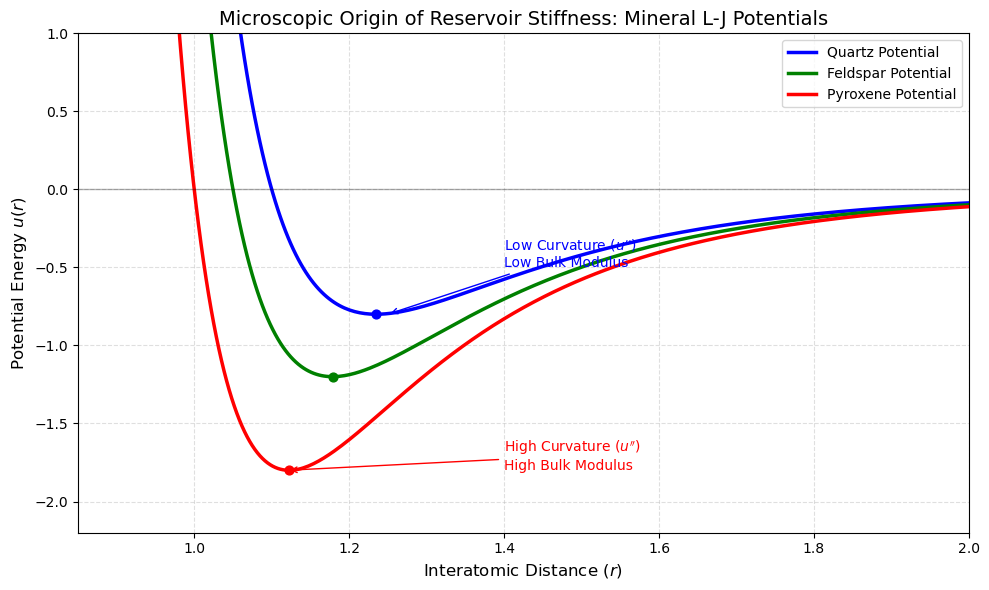

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def lj_potential(r, epsilon, sigma):
    """Calculates the Lennard-Jones 6-12 potential energy."""
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Relative parameters derived from mineral physics:
# Pyroxene: Highest B (~95 GPa) -> Stiffest, deepest well.
# Feldspar: Medium B (~55 GPa) -> Intermediate well.
# Quartz: Lowest B (~37 GPa) -> Shallowest, widest well.
minerals = {
    'Quartz':   {'epsilon': 0.8, 'sigma': 1.10, 'color': 'blue'},
    'Feldspar': {'epsilon': 1.2, 'sigma': 1.05, 'color': 'green'},
    'Pyroxene': {'epsilon': 1.8, 'sigma': 1.00, 'color': 'red'}
}

r = np.linspace(0.85, 2.5, 500)

plt.figure(figsize=(10, 6))

for name, params in minerals.items():
    eps = params['epsilon']
    sig = params['sigma']
    u_r = lj_potential(r, eps, sig)
    
    # Identify the equilibrium position (r_0 = 2^(1/6) * sigma)
    r_0 = sig * (2**(1/6))
    
    plt.plot(r, u_r, label=f'{name} Potential', color=params['color'], linewidth=2.5)
    plt.scatter(r_0, -eps, color=params['color'], s=40, zorder=5)

# Formatting the plot for a thermodynamics context
plt.axhline(0, color='black', linewidth=1, alpha=0.3)
plt.ylim(-2.2, 1.0)
plt.xlim(0.85, 2.0)

plt.title('Microscopic Origin of Reservoir Stiffness: Mineral L-J Potentials', fontsize=14)
plt.xlabel('Interatomic Distance ($r$)', fontsize=12)
plt.ylabel('Potential Energy $u(r)$', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)

# Adding annotations to connect to the Taylor derivatives
plt.annotate('High Curvature ($u\'\'$)\nHigh Bulk Modulus', xy=(1.12, -1.8), xytext=(1.4, -1.8),
             arrowprops=dict(arrowstyle='->', color='red'), color='red')
plt.annotate('Low Curvature ($u\'\'$)\nLow Bulk Modulus', xy=(1.25, -0.8), xytext=(1.4, -0.5),
             arrowprops=dict(arrowstyle='->', color='blue'), color='blue')

plt.tight_layout()
plt.savefig('mineral_lj_potentials.png')

<>:36: SyntaxWarning: invalid escape sequence '\T'
<>:36: SyntaxWarning: invalid escape sequence '\T'
/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/77920671.py:36: SyntaxWarning: invalid escape sequence '\T'
  plt.text(theta_D + 20, 2, 'Debye Temp ($\Theta_D$)', rotation=90)
/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/77920671.py:8: RuntimeWarning: overflow encountered in scalar power
  return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2


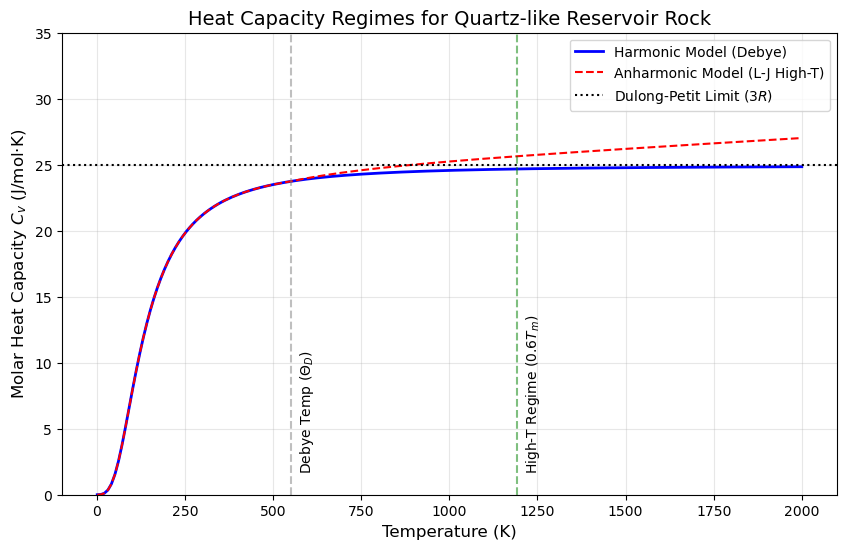

In [4]:


# Constants
R = 8.314  # Gas constant J/(mol*K)
theta_D = 550  # Approx Debye temperature for Quartz (K)
T_melt = 1986  # Melting point of Quartz (K)
T_anharmonic_start = 0.6 * T_melt

def debye_integrand(x):
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

def cv_debye(T, theta_D):
    if T == 0:
        return 0
    x_max = theta_D / T
    integral, _ = quad(debye_integrand, 0, x_max)
    return 9 * R * (T / theta_D)**3 * integral

# Temperature range from 1K to 2000K
T_range = np.linspace(1, 2000, 200)

# 1. Calculate Harmonic (Debye) Cv
cv_values = np.array([cv_debye(T, theta_D) for T in T_range])

# 2. Calculate Anharmonic Cv (Effect of LJ well widening/softening)
# We model this using a linear correction term that kicks in at higher energies
A = 0.0015  # Empirical anharmonic coefficient
cv_anharmonic = cv_values + np.where(T_range > theta_D, A * (T_range - theta_D), 0)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(T_range, cv_values, label='Harmonic Model (Debye)', color='blue', linewidth=2)
plt.plot(T_range, cv_anharmonic, label='Anharmonic Model (L-J High-T)', color='red', linestyle='--')
plt.axhline(3 * R, color='black', linestyle=':', label='Dulong-Petit Limit ($3R$)')

# Annotate the specific geothermal regimes
plt.axvline(theta_D, color='gray', linestyle='--', alpha=0.5)
plt.text(theta_D + 20, 2, 'Debye Temp ($\Theta_D$)', rotation=90)
plt.axvline(T_anharmonic_start, color='green', linestyle='--', alpha=0.5)
plt.text(T_anharmonic_start + 20, 2, 'High-T Regime ($0.6 T_m$)', rotation=90)

plt.title('Heat Capacity Regimes for Quartz-like Reservoir Rock', fontsize=14)
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Molar Heat Capacity $C_v$ (J/mol·K)', fontsize=12)
plt.ylim(0, 35)
plt.grid(True, alpha=0.3)
plt.legend()

plt.savefig('quartz_heat_capacity_regimes.png')

# Output data to CSV for course use
df = pd.DataFrame({
    'Temperature_K': T_range,
    'Cv_Harmonic_JmolK': cv_values,
    'Cv_Anharmonic_JmolK': cv_anharmonic
})
df.to_csv('quartz_cv_data.csv', index=False)

This is from PARLEY (MIT's AI client with GPT 5): 

/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/549637536.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand, x)


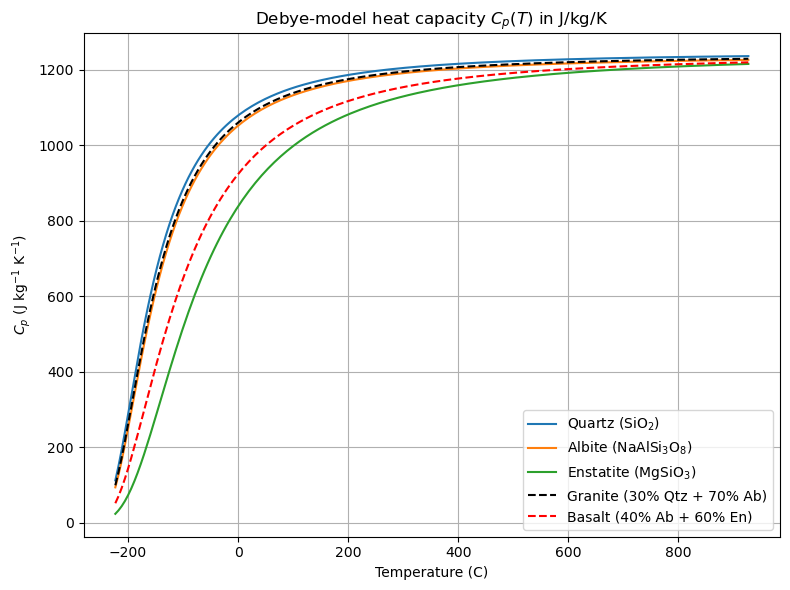

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------
# Debye heat capacity (mass basis)
# ---------------------------------
def debye_cp_mass(T, theta_D, n_atoms, molar_mass, n_points=2000):
    """
    Debye-model mass-specific heat capacity (approx. Cp ≈ Cv) for a crystal.
    
    Parameters
    ----------
    T : array_like
        Temperature in K.
    theta_D : float
        Debye temperature in K.
    n_atoms : int
        Number of atoms per formula unit.
    molar_mass : float
        Molar mass in kg/mol.
    n_points : int
        Number of integration points for the Debye integral.
    
    Returns
    -------
    Cp_mass : ndarray
        Heat capacity in J/kg/K.
    """
    R = 8.314462618  # J/mol/K
    T = np.atleast_1d(np.array(T, dtype=float))
    Cp_mass = np.zeros_like(T)
    
    for i, Ti in enumerate(T):
        if Ti <= 0:
            Cp_mass[i] = 0.0
            continue
        x_max = theta_D / Ti
        x = np.linspace(1e-6, x_max, n_points)
        ex = np.exp(x)
        integrand = x**4 * ex / (ex - 1.0)**2
        integral = np.trapz(integrand, x)
        Cp_molar = 9.0 * n_atoms * R * (Ti / theta_D)**3 * integral  # J/mol/K
        Cp_mass[i] = Cp_molar / molar_mass  # J/kg/K
    
    return Cp_mass


# ---------------------------------
# Mineral data (approximate)
# ---------------------------------
# Molar masses (kg/mol)
M_quartz    = 60.0843e-3   # SiO2
M_albite    = 262.220e-3   # NaAlSi3O8
M_enstatite = 100.387e-3   # MgSiO3

# Atoms per formula unit
n_quartz    = 3   # SiO2
n_albite    = 13  # NaAlSi3O8
n_enstatite = 5   # MgSiO3

# Debye temperatures (order-of-magnitude estimates)
thetaD_quartz    = 470.0   # K
thetaD_albite    = 500.0   # K
thetaD_enstatite = 800.0   # K


# ---------------------------------
# Temperature grid
# ---------------------------------
T = np.linspace(50.0, 1200.0, 200)  # K


# ---------------------------------
# Cp(T) for individual minerals (J/kg/K)
# ---------------------------------
Cp_quartz_mass    = debye_cp_mass(T, thetaD_quartz,    n_quartz,    M_quartz)
Cp_albite_mass    = debye_cp_mass(T, thetaD_albite,    n_albite,    M_albite)
Cp_enstatite_mass = debye_cp_mass(T, thetaD_enstatite, n_enstatite, M_enstatite)


# ---------------------------------
# Simple rock mixtures (mass-based)
# ---------------------------------
# Very simple mass fractions (for illustration only)
w_quartz_granite = 0.30
w_albite_granite = 0.70

w_albite_basalt    = 0.40
w_enstatite_basalt = 0.60

Cp_granite_mass = (
    w_quartz_granite * Cp_quartz_mass +
    w_albite_granite * Cp_albite_mass
)

Cp_basalt_mass = (
    w_albite_basalt    * Cp_albite_mass +
    w_enstatite_basalt * Cp_enstatite_mass
)


# ---------------------------------
# Plotting (all curves in J/kg/K)
# ---------------------------------
plt.figure(figsize=(8, 6))

# Minerals
plt.plot(T-273, Cp_quartz_mass,    label='Quartz (SiO$_2$)')
plt.plot(T-273, Cp_albite_mass,    label='Albite (NaAlSi$_3$O$_8$)')
plt.plot(T-273, Cp_enstatite_mass, label='Enstatite (MgSiO$_3$)')

# Rocks
plt.plot(T-273, Cp_granite_mass, 'k--', label='Granite (30% Qtz + 70% Ab)')
plt.plot(T-273, Cp_basalt_mass,  'r--', label='Basalt (40% Ab + 60% En)')

plt.xlabel('Temperature (C)')
plt.ylabel('$C_p$ (J kg$^{-1}$ K$^{-1}$)')
plt.title('Debye-model heat capacity $C_p(T)$ in J/kg/K')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

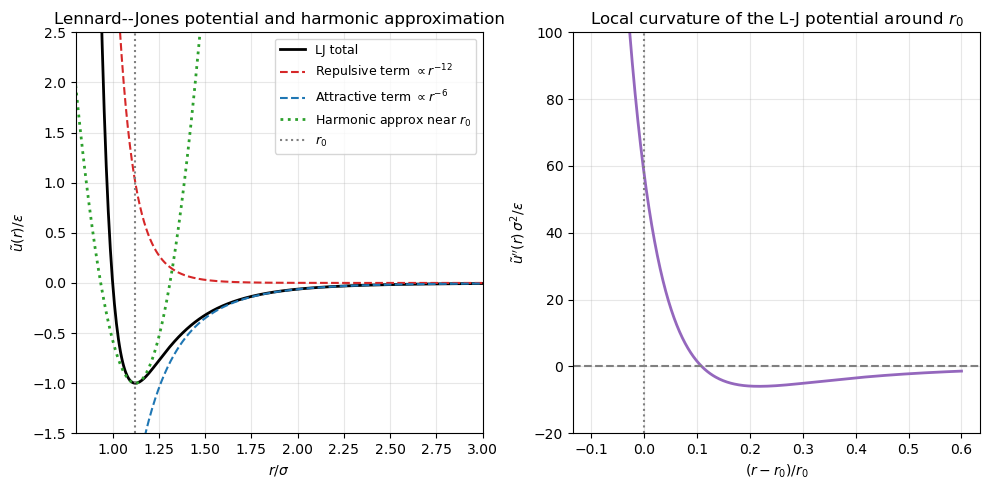

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# Parameters for the Lennard-Jones potential
# -----------------------------------------
epsilon = 1.0   # depth of the well
sigma = 1.0     # zero-crossing distance

# Equilibrium distance r0 for 12-6 Lennard-Jones
r0 = 2**(1/6) * sigma

# -----------------------------------------
# Lennard-Jones potential and derivatives
# -----------------------------------------
def lj_potential(r, epsilon=1.0, sigma=1.0):
    """Full Lennard-Jones 12-6 potential."""
    sr6 = (sigma / r)**6
    return 4 * epsilon * (sr6**2 - sr6)

def lj_repulsive(r, epsilon=1.0, sigma=1.0):
    """Repulsive r^-12 term only."""
    return 4 * epsilon * (sigma / r)**12

def lj_attractive(r, epsilon=1.0, sigma=1.0):
    """Attractive r^-6 term only."""
    return -4 * epsilon * (sigma / r)**6

def lj_second_derivative(r, epsilon=1.0, sigma=1.0):
    """Second derivative d^2u/dr^2 of the Lennard-Jones potential."""
    term1 = 156.0 * sigma**12 / r**14
    term2 = 42.0  * sigma**6  / r**8
    return 4.0 * epsilon * (term1 - term2)

# Curvature (second derivative) at the minimum
k = lj_second_derivative(r0, epsilon, sigma)
u0 = lj_potential(r0, epsilon, sigma)

def harmonic_approx(r):
    """Harmonic approximation of LJ around r0: u ≈ u0 + 0.5 k (r - r0)^2."""
    return u0 + 0.5 * k * (r - r0)**2

# -----------------------------------------
# Grids for plotting
# -----------------------------------------

# Left subplot: LJ potential vs r/sigma
s = np.linspace(0.8, 3.0, 400)  # dimensionless coordinate r/sigma
r = s * sigma

# Right subplot: curvature vs fractional expansion (r - r0)/r0
x = np.linspace(-0.4, 0.6, 400)  # fractional expansion around r0
r_expanded = r0 * (1.0 + x)

curvature = lj_second_derivative(r_expanded, epsilon, sigma)
# Normalize curvature to dimensionless units: (epsilon / sigma^2)
curvature_nd = curvature * sigma**2 / epsilon

# -----------------------------------------
# Plotting
# -----------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# --- Left subplot: potential and harmonic approximation ---
ax = axes[0]

ax.plot(s, lj_potential(r, epsilon, sigma) / epsilon,
        label='LJ total', color='k', linewidth=2)

ax.plot(s, lj_repulsive(r, epsilon, sigma) / epsilon,
        '--', label='Repulsive term $\\propto r^{-12}$', color='tab:red')

ax.plot(s, lj_attractive(r, epsilon, sigma) / epsilon,
        '--', label='Attractive term $\\propto r^{-6}$', color='tab:blue')

ax.plot(s, harmonic_approx(r) / epsilon,
        ':', label='Harmonic approx near $r_0$', color='tab:green', linewidth=2)

ax.axvline(r0 / sigma, color='gray', linestyle=':', label='$r_0$')

ax.set_xlabel(r'$r/\sigma$')
ax.set_ylabel(r'$\tilde{u}(r)/\epsilon$')
ax.set_title('Lennard--Jones potential and harmonic approximation')

ax.set_xlim(0.8, 3.0)
ax.set_ylim(-1.5, 2.5)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=9)

# --- Right subplot: second derivative (curvature) vs expansion ---
# ax2 = axes[1]

# ax2.plot(x, curvature_nd, color='tab:purple', linewidth=2)
# ax2.axvline(0.0, color='gray', linestyle=':')

# ax2.set_xlabel(r'$(r - r_0)/r_0$')
# ax2.set_ylabel(r"$\tilde{u}''(r)\,\sigma^2/\epsilon$")
# ax2.set_title('Local curvature of the L-J potential around $r_0$')
# #ax2.set_yscale('log')
# ax2.grid(True, alpha=0.3)

# Right subplot: zoom on modest strains around r0
x = np.linspace(-0.1, 0.6, 400)            # smaller compression range
r_expanded = r0 * (1.0 + x)

curvature = lj_second_derivative(r_expanded, epsilon, sigma)
curvature_nd = curvature * sigma**2 / epsilon

ax2 = axes[1]
ax2.plot(x, curvature_nd, color='tab:purple', linewidth=2)
ax2.axhline(0.0, color='gray', linestyle='--')
ax2.axvline(0.0, color='gray', linestyle=':')

ax2.set_xlabel(r'$(r - r_0)/r_0$')
ax2.set_ylabel(r"$\tilde{u}''(r)\,\sigma^2/\epsilon$")
ax2.set_title('Local curvature of the L-J potential around $r_0$')

# Limit y-range to highlight sign change
ax2.set_ylim(-20, 100)

ax2.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()

/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/1031276138.py:40: RuntimeWarning: overflow encountered in square
  integrand = x**4 * ex / (ex - 1.0)**2
/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/1031276138.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand, x)


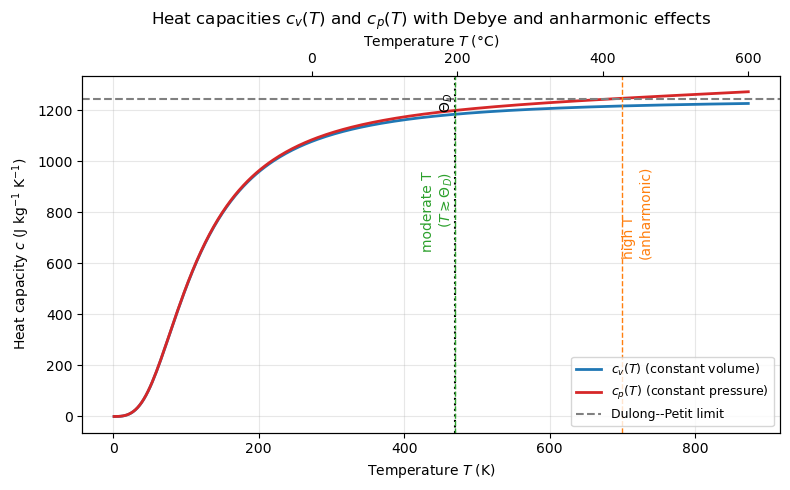

In [26]:
# import numpy as np
# import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Debye heat capacity (molar) and conversion to mass basis
# ---------------------------------------------------------
def debye_cv_molar(T, theta_D, n_atoms, n_points=1500):
    """
    Debye-model molar heat capacity at constant volume (C_V) in J/mol/K.

    Parameters
    ----------
    T : array_like
        Temperature in K.
    theta_D : float
        Debye temperature in K.
    n_atoms : int
        Number of atoms per formula unit.
    n_points : int
        Integration resolution for Debye integral.

    Returns
    -------
    Cv_molar : ndarray
        Molar heat capacity in J/mol/K.
    """
    R = 8.314462618  # J/mol/K
    T = np.atleast_1d(np.array(T, dtype=float))
    Cv = np.zeros_like(T)

    for i, Ti in enumerate(T):
        if Ti <= 0.0:
            Cv[i] = 0.0
            continue

        x_max = theta_D / Ti
        # Numerical integration using trapezoidal rule
        x = np.linspace(1e-6, x_max, n_points)
        ex = np.exp(x)
        integrand = x**4 * ex / (ex - 1.0)**2
        integral = np.trapz(integrand, x)

        Cv[i] = 9.0 * n_atoms * R * (Ti / theta_D)**3 * integral

    return Cv


# ---------------------------------------------------------
# Parameters for a representative silicate mineral (e.g. quartz-like)
# ---------------------------------------------------------

# Debye parameters
theta_D = 470.0      # K, Debye temperature (order-of-magnitude for quartz)
n_atoms = 3          # atoms per formula unit (e.g. SiO2)

# Molar mass and density (for conversion to J/kg/K)
M_molar = 60.0843e-3   # kg/mol, SiO2
rho = 2650.0           # kg/m^3, typical rock density
v_specific = 1.0 / rho # m^3/kg

# Elastic/thermal properties (order-of-magnitude)
B = 60e9    # Pa, bulk modulus ~60 GPa
alpha0 = 2.5e-5  # 1/K, baseline volumetric thermal expansion near room T

def alpha_V(T):
    """
    Simple model for volumetric thermal expansion coefficient α_V(T), 1/K.

    Grows with T to mimic stronger anharmonic effects at high T.
    """
    T = np.array(T, dtype=float)
    return alpha0 * (1.0 + 0.5 * (T / theta_D))


# ---------------------------------------------------------
# Temperature range
# ---------------------------------------------------------
T_min = 1.0      # K (avoid exactly 0 for Debye integral)
T_max = 600.0 + 273.15  # up to 600 °C in K
T = np.linspace(T_min, T_max, 300)

# ---------------------------------------------------------
# Compute c_v(T) and c_p(T) (mass-specific, J/kg/K)
# ---------------------------------------------------------
Cv_molar = debye_cv_molar(T, theta_D, n_atoms)        # J/mol/K
c_v = Cv_molar / M_molar                              # J/kg/K
alpha_T = alpha_V(T)                                  # 1/K

# c_p - c_v = alpha_V^2 * B * T * v_specific
c_p = c_v + alpha_T**2 * B * T * v_specific           # J/kg/K

# Dulong-Petit limit (mass-specific)
R = 8.314462618
C_DP_molar = 3.0 * n_atoms * R        # J/mol/K
c_DP = C_DP_molar / M_molar           # J/kg/K

# Define boundaries for "moderate" and "high" T regimes (illustrative)
T_moderate_start = theta_D            # start of moderate T regime
T_high_start = 700.0                  # K, where anharmonic Cp-Cv becomes more visible (example)


# ---------------------------------------------------------
# Plotting
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

# Plot c_v and c_p
ax.plot(T, c_v, label=r'$c_v(T)$ (constant volume)', color='tab:blue', linewidth=2)
ax.plot(T, c_p, label=r'$c_p(T)$ (constant pressure)', color='tab:red', linewidth=2)

# Dulong-Petit limit
ax.axhline(c_DP, color='gray', linestyle='--', linewidth=1.5,
           label='Dulong--Petit limit')

# Vertical line for Debye temperature
ax.axvline(theta_D, color='k', linestyle=':', linewidth=1.5)
ax.text(theta_D, ax.get_ylim()[1]*0.95,
        r'$\Theta_D$', rotation=90, va='top', ha='right')

# Moderate and high T regime markers
ax.axvline(T_moderate_start, color='tab:green', linestyle='--', linewidth=1.0)
ax.axvline(T_high_start,     color='tab:orange', linestyle='--', linewidth=1.0)

ax.text(T_moderate_start, ax.get_ylim()[1]*0.60,
        'moderate T\n($T\\gtrsim\\Theta_D$)',
        rotation=90, va='center', ha='right', color='tab:green')

ax.text(T_high_start, ax.get_ylim()[1]*0.60,
        'high T\n(anharmonic)',
        rotation=90, va='center', ha='left', color='tab:orange')

# Labels and formatting
ax.set_xlabel('Temperature $T$ (K)')
ax.set_ylabel(r'Heat capacity $c$ (J kg$^{-1}$ K$^{-1}$)')
ax.set_title('Heat capacities $c_v(T)$ and $c_p(T)$ with Debye and anharmonic effects')

ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=9)

# ---------------------------------------------------------
# Twin x-axis for temperature in °C
# ---------------------------------------------------------
ax_celsius = ax.twiny()

# Align the twin x-axis with the primary axis limits
ax_celsius.set_xlim(ax.get_xlim())

# Choose some Celsius tick marks and convert to K for positioning
T_C_ticks = np.array([0.0, 200.0, 400.0, 600.0])      # °C
T_K_ticks = T_C_ticks + 273.15                        # K

# Only keep ticks within plotting range
mask = (T_K_ticks >= T_min) & (T_K_ticks <= T_max)
T_C_ticks = T_C_ticks[mask]
T_K_ticks = T_K_ticks[mask]

ax_celsius.set_xticks(T_K_ticks)
ax_celsius.set_xticklabels([f'{tc:.0f}' for tc in T_C_ticks])
ax_celsius.set_xlabel('Temperature $T$ (°C)')

plt.tight_layout()
plt.show()

/var/folders/1p/jdcprp414tsg3dl650mtvk780000gn/T/ipykernel_76716/3397721059.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(integrand, x)


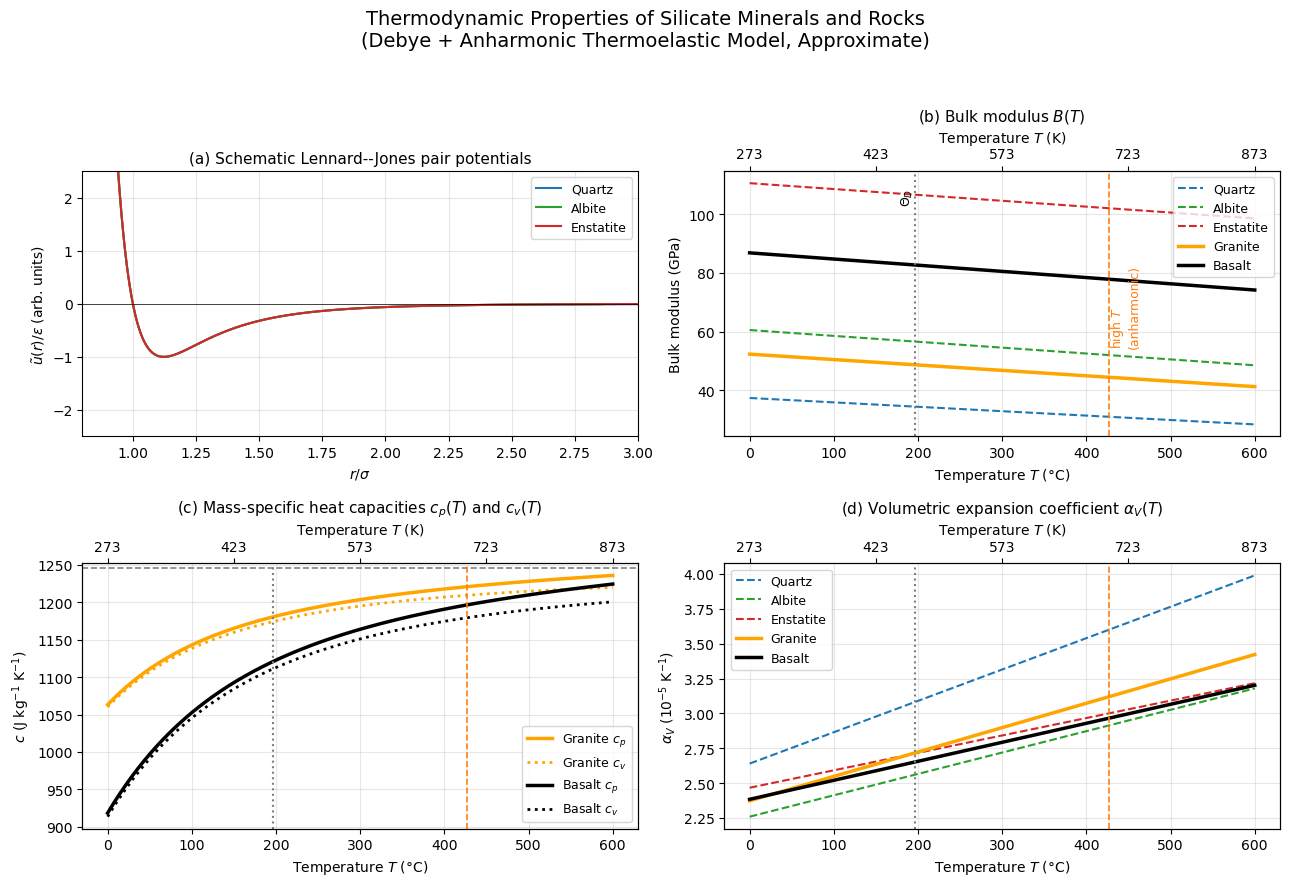

In [29]:
# =========================================================
# 1. Debye heat capacity (molar) and helper functions
# =========================================================

def debye_cv_molar(T, theta_D, n_atoms, n_points=1500):
    """
    Debye-model molar heat capacity at constant volume, C_V(T), in J/mol/K.

    Parameters
    ----------
    T : array_like
        Temperature in K.
    theta_D : float
        Debye temperature in K.
    n_atoms : int
        Number of atoms per formula unit.
    n_points : int
        Number of integration points for the Debye integral.

    Returns
    -------
    Cv_molar : ndarray
        Heat capacity in J/mol/K.
    """
    R = 8.314462618  # J/mol/K
    T = np.atleast_1d(np.array(T, dtype=float))
    Cv = np.zeros_like(T)

    for i, Ti in enumerate(T):
        if Ti <= 0.0:
            Cv[i] = 0.0
            continue
        x_max = theta_D / Ti
        x = np.linspace(1e-6, x_max, n_points)
        ex = np.exp(x)
        integrand = x**4 * ex / (ex - 1.0)**2
        integral = np.trapz(integrand, x)
        Cv[i] = 9.0 * n_atoms * R * (Ti / theta_D)**3 * integral

    return Cv


# =========================================================
# 2. Mineral parameters (approximate, for teaching)
# =========================================================

# Each mineral: density rho (kg/m3), molar mass M (kg/mol),
# Debye temperature theta_D (K), n_atoms per formula unit,
# bulk modulus at 300 K (B0, Pa), dB/dT (Pa/K),
# baseline volumetric expansion alpha0 at 300 K (1/K),
# and a mild T-dependence factor for alpha(T).

minerals = {
    'Quartz': {
        'rho': 2650.0,
        'M': 60.0843e-3,
        'theta_D': 470.0,
        'n_atoms': 3,
        'B0': 37e9,
        'dB_dT': -1.5e7,     # ~ -0.015 GPa/K
        'alpha0': 2.7e-5,    # 1/K at ~300 K
        'alpha_slope': 0.5,  # ~50% increase from 300 to 900 K
        'color': '#1f77b4'
    },
    'Albite': {  # representative feldspar
        'rho': 2620.0,
        'M': 262.220e-3,
        'theta_D': 500.0,
        'n_atoms': 13,
        'B0': 60e9,
        'dB_dT': -2.0e7,     # ~ -0.02 GPa/K
        'alpha0': 2.3e-5,
        'alpha_slope': 0.4,
        'color': '#2ca02c'
    },
    'Enstatite': {  # orthopyroxene
        'rho': 3200.0,
        'M': 100.387e-3,
        'theta_D': 800.0,
        'n_atoms': 5,
        'B0': 110e9,
        'dB_dT': -2.0e7,
        'alpha0': 2.5e-5,
        'alpha_slope': 0.3,
        'color': '#d62728'
    }
}


def mineral_properties(T_K, params):
    """
    Compute c_v(T), c_p(T), alpha_V(T), and B(T) for a mineral.

    All heat capacities are mass-specific J/kg/K.
    Alpha is volumetric 1/K. B is in Pa.
    """
    T_K = np.array(T_K, dtype=float)

    # Debye Cv (molar) and convert to mass-specific units
    Cv_molar = debye_cv_molar(T_K, params['theta_D'], params['n_atoms'])
    c_v = Cv_molar / params['M']  # J/kg/K

    # Bulk modulus with mild linear softening
    B = params['B0'] + params['dB_dT'] * (T_K - 300.0)  # Pa

    # Volumetric expansion coefficient alpha_V(T) (simple linear growth)
    # alpha(T) = alpha0 * [1 + alpha_slope * (T-300)/600], for T~273-900 K
    alpha0 = params['alpha0']
    slope = params['alpha_slope']
    alpha = alpha0 * (1.0 + slope * (T_K - 300.0) / 600.0)

    # c_p - c_v = T * alpha^2 * B / rho
    rho = params['rho']
    cp_minus_cv = T_K * alpha**2 * B / rho
    c_p = c_v + cp_minus_cv

    return c_p, c_v, alpha, B


# =========================================================
# 3. Rock mixtures: granite and basalt
# =========================================================

def mix_rock(T_K, vol_fracs, minerals_dict):
    """
    Mix minerals into a rock using volume fractions.

    vol_fracs: dict of {mineral_name: phi} with sum(phi) = 1.
    Returns dictionaries of mass-specific c_p, c_v, volumetric alpha,
    Hill-averaged B, and effective density rho_mix.
    """
    # Collect arrays per mineral
    names = list(vol_fracs.keys())
    phi = np.array([vol_fracs[n] for n in names], dtype=float)

    # Compute each mineral's properties at T_K
    cp_i = []
    cv_i = []
    alpha_i = []
    B_i = []
    rho_i = []

    for n in names:
        params = minerals_dict[n]
        c_p, c_v, alpha, B = mineral_properties(T_K, params)
        cp_i.append(c_p)
        cv_i.append(c_v)
        alpha_i.append(alpha)
        B_i.append(B)
        rho_i.append(params['rho'])

    cp_i = np.array(cp_i)      # shape (n_min, n_T)
    cv_i = np.array(cv_i)
    alpha_i = np.array(alpha_i)
    B_i = np.array(B_i)
    rho_i = np.array(rho_i)    # shape (n_min,)

    # Effective density (simple volume-fraction mix)
    rho_mix = np.sum(phi[:, None] * rho_i[:, None], axis=0)  # kg/m3

    # Mass fractions w_i = (phi_i * rho_i) / rho_mix
    w_i = (phi[:, None] * rho_i[:, None]) / rho_mix

    # Mass-specific heat capacities (mass-weighted)
    cp_mix = np.sum(w_i * cp_i, axis=0)
    cv_mix = np.sum(w_i * cv_i, axis=0)

    # Volumetric expansion coefficient (volume-weighted)
    alpha_mix = np.sum(phi[:, None] * alpha_i, axis=0)

    # Bulk modulus: Hill average of Voigt and Reuss
    # Voigt: B_V = sum(phi_i * B_i)
    B_V = np.sum(phi[:, None] * B_i, axis=0)
    # Reuss: 1/B_R = sum(phi_i / B_i)
    B_R_inv = np.sum(phi[:, None] / B_i, axis=0)
    B_R = 1.0 / B_R_inv
    B_mix = 0.5 * (B_V + B_R)

    return {
        'Cp': cp_mix,
        'Cv': cv_mix,
        'Alpha': alpha_mix,
        'B': B_mix,
        'Rho': rho_mix
    }


# =========================================================
# 4. Temperature grid and minerals/rocks results
# =========================================================

# Temperature range: 0 to 600 °C
T_C = np.linspace(0.0, 600.0, 250)
T_K = T_C + 273.15

# Compute properties for each mineral
results = {}
for name, params in minerals.items():
    c_p, c_v, alpha, B = mineral_properties(T_K, params)
    results[name] = {
        'Cp': c_p,
        'Cv': c_v,
        'Alpha': alpha,
        'B': B,
        'Rho': params['rho'],
        'Color': params['color']
    }

# Define simple modal compositions by volume
granite_vol = {'Quartz': 0.30, 'Albite': 0.70}
basalt_vol  = {'Albite': 0.40, 'Enstatite': 0.60}

granite = mix_rock(T_K, granite_vol, minerals)
basalt  = mix_rock(T_K, basalt_vol, minerals)

results['Granite'] = {**granite, 'Color': 'orange'}
results['Basalt']  = {**basalt,  'Color': 'black'}


# =========================================================
# 5. Schematic Lennard-Jones potentials for panel (a)
# =========================================================

def lj_potential(r, epsilon, sigma):
    """Lennard-Jones 12-6 potential."""
    sr6 = (sigma / r)**6
    return 4.0 * epsilon * (sr6**2 - sr6)  # arbitrary units


lj_params = {
    'Quartz':    {'epsilon': 1.0, 'sigma': 1.00, 'color': minerals['Quartz']['color']},
    'Albite':    {'epsilon': 0.8, 'sigma': 1.05, 'color': minerals['Albite']['color']},
    'Enstatite': {'epsilon': 1.2, 'sigma': 0.95, 'color': minerals['Enstatite']['color']}
}

r = np.linspace(0.8, 3.0, 400)  # in units of sigma (schematic)


# =========================================================
# 6. Plotting: 4-panel figure
# =========================================================

fig, axs = plt.subplots(2, 2, figsize=(13, 9))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# ---------------------------------------------------------
# Panel (a): schematic Lennard-Jones potentials
# ---------------------------------------------------------
ax = axs[0, 0]
for name, p in lj_params.items():
    u = lj_potential(r, p['epsilon'], p['sigma'])
    ax.plot(r / p['sigma'], u / p['epsilon'],
            label=name, color=p['color'])

ax.axhline(0.0, color='k', linewidth=0.5)
ax.set_xlabel(r'$r/\sigma$')
ax.set_ylabel(r'$\tilde{u}(r)/\epsilon$ (arb. units)')
ax.set_title('(a) Schematic Lennard--Jones pair potentials', fontsize=11)
ax.set_xlim(0.8, 3.0)
ax.set_ylim(-2.5, 2.5)
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)


# Helper to add top axis in Kelvin for T-based plots
def add_kelvin_top_axis(ax, T_C_min=0.0, T_C_max=600.0):
    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    # Choose tick locations in °C and label them in K
    T_C_ticks = np.linspace(T_C_min, T_C_max, 5)
    T_K_ticks = T_C_ticks + 273.15
    ax_top.set_xticks(T_C_ticks)
    ax_top.set_xticklabels([f'{Tk:.0f}' for Tk in T_K_ticks])
    ax_top.set_xlabel('Temperature $T$ (K)')
    return ax_top


# ---------------------------------------------------------
# Panel (b): Bulk modulus B(T)
# ---------------------------------------------------------
axB = axs[0, 1]
for name in ['Quartz', 'Albite', 'Enstatite', 'Granite', 'Basalt']:
    c = results[name]['Color']
    ls = '-' if name in ['Granite', 'Basalt'] else '--'
    lw = 2.5 if name in ['Granite', 'Basalt'] else 1.5
    axB.plot(T_C, results[name]['B'] / 1e9,
             label=name, color=c, linestyle=ls, linewidth=lw)

axB.set_title('(b) Bulk modulus $B(T)$', fontsize=11)
axB.set_ylabel('Bulk modulus (GPa)')
axB.set_xlabel('Temperature $T$ (°C)')
axB.grid(True, alpha=0.3)
axB.legend(fontsize=9, loc='upper right')

# Mark Debye temperature (for quartz) and a "high-T" mark
theta_D_quartz = minerals['Quartz']['theta_D']
T_D_quartz_C = theta_D_quartz - 273.15
T_high_K = 700.0
T_high_C = T_high_K - 273.15

axB.axvline(T_D_quartz_C, color='gray', linestyle=':', linewidth=1.5)
axB.text(T_D_quartz_C, axB.get_ylim()[1]*0.95,
         r'$\Theta_D$', rotation=90, va='top', ha='right', fontsize=9)

axB.axvline(T_high_C, color='tab:orange', linestyle='--', linewidth=1.2)
axB.text(T_high_C, axB.get_ylim()[1]*0.60,
         'high $T$\n(anharmonic)', rotation=90,
         va='center', ha='left', fontsize=9, color='tab:orange')

add_kelvin_top_axis(axB)


# ---------------------------------------------------------
# Panel (c): Heat capacities c_p(T) and c_v(T) for rocks
# ---------------------------------------------------------
axC = axs[1, 0]

for name in ['Granite', 'Basalt']:
    c = results[name]['Color']
    # Cp
    axC.plot(T_C, results[name]['Cp'], label=f'{name} $c_p$', color=c, linewidth=2.5)
    # Cv
    axC.plot(T_C, results[name]['Cv'], label=f'{name} $c_v$', color=c,
             linestyle=':', linewidth=2.0)

axC.set_title('(c) Mass-specific heat capacities $c_p(T)$ and $c_v(T)$', fontsize=11)
axC.set_ylabel(r'$c$ (J kg$^{-1}$ K$^{-1}$)')
axC.set_xlabel('Temperature $T$ (°C)')
axC.grid(True, alpha=0.3)
axC.legend(fontsize=9, loc='lower right')

# Dulong-Petit line for a quartz-like composition per kg
R = 8.314462618
C_DP_molar = 3.0 * minerals['Quartz']['n_atoms'] * R
c_DP = C_DP_molar / minerals['Quartz']['M']
axC.axhline(c_DP, color='gray', linestyle='--', linewidth=1.2,
            label='Dulong--Petit (quartz)')
# (legend already drawn; this is mainly a visual reference)

# Mark Debye temperature (quartz) and high-T mark
axC.axvline(T_D_quartz_C, color='gray', linestyle=':', linewidth=1.5)
axC.axvline(T_high_C, color='tab:orange', linestyle='--', linewidth=1.2)

add_kelvin_top_axis(axC)


# ---------------------------------------------------------
# Panel (d): Thermal expansion α_V(T)
# ---------------------------------------------------------
axA = axs[1, 1]

for name in ['Quartz', 'Albite', 'Enstatite', 'Granite', 'Basalt']:
    c = results[name]['Color']
    ls = '-' if name in ['Granite', 'Basalt'] else '--'
    lw = 2.5 if name in ['Granite', 'Basalt'] else 1.5
    # Convert to 1e-5 /K for plotting
    axA.plot(T_C, results[name]['Alpha'] * 1e5,
             label=name, color=c, linestyle=ls, linewidth=lw)

axA.set_title('(d) Volumetric expansion coefficient $\\alpha_V(T)$', fontsize=11)
axA.set_ylabel(r'$\alpha_V$ ($10^{-5}$ K$^{-1}$)')
axA.set_xlabel('Temperature $T$ (°C)')
axA.grid(True, alpha=0.3)
axA.legend(fontsize=9, loc='upper left')

# Mark Debye and high-T again, for visual consistency
axA.axvline(T_D_quartz_C, color='gray', linestyle=':', linewidth=1.5)
axA.axvline(T_high_C, color='tab:orange', linestyle='--', linewidth=1.2)

add_kelvin_top_axis(axA)

plt.suptitle('Thermodynamic Properties of Silicate Minerals and Rocks\n'
             '(Debye + Anharmonic Thermoelastic Model, Approximate)',
             fontsize=14)
plt.tight_layout(rect=[0, 0.0, 1, 0.95])
plt.show()

In [85]:
# ---------------------------------------------------------
# 0. Mineral data (illustrative, order-of-magnitude realistic)
#    Values are approximate; replace with coefficients from
#    Robie & Hemingway (1995), Berman (1988), etc., if needed.
# ---------------------------------------------------------
minerals = {
    'Quartz': {
        'rho': 2650.0,          # kg/m^3
        'M':   0.06008,         # kg/mol (SiO2)
        'B0_GPa': 37.0,         # Bulk modulus at T_ref (GPa)
        # Maier-Kelley Cp(T) = a + b*T - c*T^-2 [J/mol/K], approximate
        'cp_mk': {'a': 44.60, 'b': 0.0377, 'c': 1.0e6},
        # Volumetric alpha: alpha_V(T) = (a + b*T_C)*1e-6 [1/K], approximate
        'alpha_poly': {'a': 20.0, 'b': 0.020},
        'color': '#1f77b4',
        # Lennard-Jones parameters (arbitrary, for visual distinction)
        'lj': {'epsilon': 1.0, 'sigma': 1.05}
    },
    'Albite': {   # NaAlSi3O8 as representative feldspar
        'rho': 2620.0,          # kg/m^3
        'M':   0.2622,          # kg/mol
        'B0_GPa': 50.0,         # GPa
        #'cp_mk': {'a': 210.0, 'b': 0.160, 'c': 5.5e6}, Hallucinations! 
        'cp_mk': {'a': 110.0, 'b': 0.160, 'c': 5.5e6},
        'alpha_poly': {'a': 16.0, 'b': 0.015},
        'color': '#2ca02c',
        'lj': {'epsilon': 1.2, 'sigma': 0.95}
    },
    'Pyroxene': {  # Diopside-like pyroxene
        'rho': 3290.0,          # kg/m^3
        'M':   0.2165,          # kg/mol
        'B0_GPa': 110.0,        # GPa
        'cp_mk': {'a': 166.0, 'b': 0.045, 'c': 3.5e6},
        'alpha_poly': {'a': 18.0, 'b': 0.012},
        'color': '#d62728',
        'lj': {'epsilon': 1.4, 'sigma': 0.9}
    }
}

# Approximate dB/dT for all silicates (GPa/K) – heuristic
dBdT_GPa = -0.02   # Bulk modulus softening with temperature


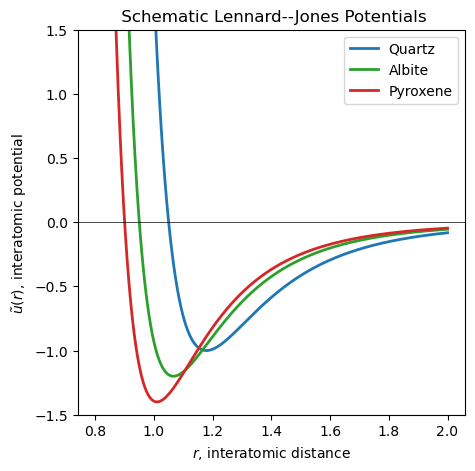

In [86]:
# PLOT LJ POTENTIAL PARAMETERS

# Lennard-Jones potential for panel (a)
def lj_potential(r, epsilon, sigma):
    """
    Lennard-Jones 12-6 potential: u(r) = 4*epsilon[(sigma/r)^12 - (sigma/r)^6].
    """
    sr6 = (sigma / r)**6
    return 4.0 * epsilon * (sr6**2 - sr6)


# ---------------------------------------------------------
fig, ax = plt.subplots(1, figsize=(5, 5))
#plt.subplots_adjust(hspace=0.3, wspace=0.3)

# ---------------------------------------------------------
# (a) Interatomic potentials: Lennard-Jones for 3 minerals
# ---------------------------------------------------------

r = np.linspace(0.8, 2.0, 400)

for name in ['Quartz', 'Albite', 'Pyroxene']:
    pars = minerals[name]['lj']
    eps, sig = pars['epsilon'], pars['sigma']
    u = lj_potential(r, eps, sig)
    ax.plot(r, u , label=name, color=minerals[name]['color'], linewidth=2)

ax.axhline(0.0, color='k', lw=0.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel(r'$r$, interatomic distance ')
ax.set_ylabel(r'$\tilde{u}(r)$, interatomic potential ')
ax.set_title(' Schematic Lennard--Jones Potentials', fontsize=12)
ax.legend()

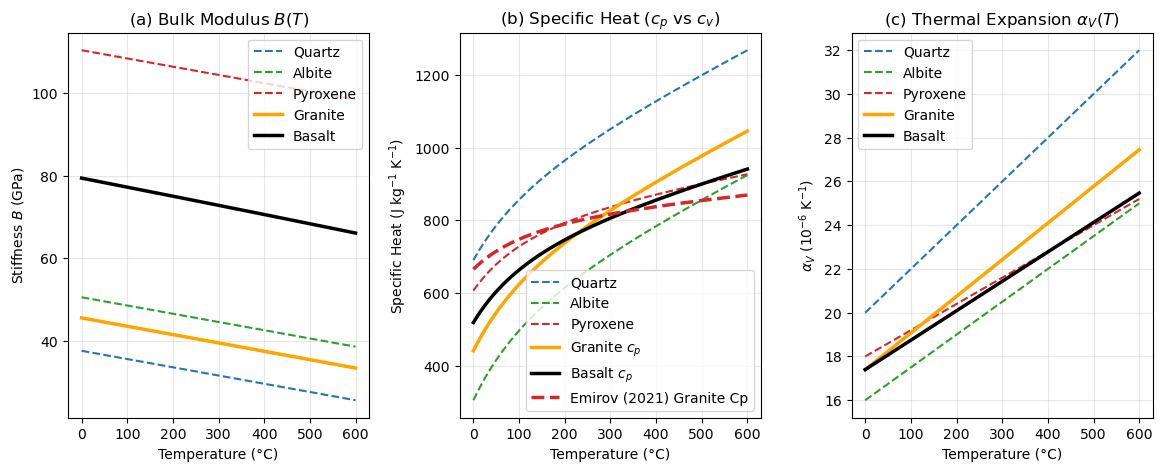

In [89]:


# ---------------------------------------------------------
# 1. Temperature range
# ---------------------------------------------------------
T_C = np.linspace(0.0, 600.0, 250)      # Temperature in °C
T_K = T_C + 273.15                      # Temperature in K

T_ref = 298.15                          # Reference temperature (K), ~25°C

# ---------------------------------------------------------
# 3. Helper functions
# ---------------------------------------------------------
R = 8.314462618  # J/mol/K

def f_cp_granite_emirov(T_K,Cp_0 = 790):
     #[J/kg/K] 
    T0 = 473 # [K]
    a = 1   
    b = d = 0.065 
    Cp = Cp_0*( a + b*(T_K/T0) - d*(T_K/T0)**(-2))
    return Cp


def cp_molar_MaierKelley(T_K, mk):
    """
    Maier-Kelley form: Cp(T) = a + b*T - c/T^2  [J/mol/K]
    """
    a, b, c = mk['a'], mk['b'], mk['c']
    return a + b*T_K - c / (T_K**2)


def alpha_V(T_C, coeffs):
    """
    Volumetric thermal expansion: alpha_V(T) = (a + b*T_C)*1e-6 [1/K].
    T_C in °C; a, b in microstrain units ~ O(10, 0.01).
    """
    a, b = coeffs['a'], coeffs['b']
    return (a + b * T_C) * 1e-6


def B_of_T(T_K, B0_GPa, dBdT_GPa, T_ref):
    """
    Linear temperature dependence of bulk modulus:
    B(T) = [B0_GPa + dBdT_GPa*(T - T_ref)] in Pa.
    """
    B_GPa = B0_GPa + dBdT_GPa * (T_K - T_ref)
    return B_GPa * 1e9  # Convert GPa -> Pa


def compute_mineral_properties(T_C, T_K, data):
    """
    Compute cp(T), cv(T), alpha_V(T), B(T) for one mineral.
    Returns:
      Cp_spec, Cv_spec [J/kg/K], alpha_V [1/K], B [Pa]
    """
    rho = data['rho']
    M   = data['M']

    # Cp molar, then convert to mass-specific
    Cp_molar = cp_molar_MaierKelley(T_K, data['cp_mk'])  # J/mol/K
    Cp_spec  = Cp_molar / M                              # J/kg/K

    # Volumetric expansion
    alpha = alpha_V(T_C, data['alpha_poly'])             # 1/K

    # Bulk modulus
    B = B_of_T(T_K, data['B0_GPa'], dBdT_GPa, T_ref)     # Pa

    # Cp - Cv = T * alpha^2 * B / rho
    dilation_term = T_K * (alpha**2) * B / rho          # J/kg/K
    Cv_spec = Cp_spec - dilation_term

    return Cp_spec, Cv_spec, alpha, B



# ---------------------------------------------------------
# 4. Compute mineral properties over T
# ---------------------------------------------------------
results = {}
for name, data in minerals.items():
    Cp, Cv, alpha, B = compute_mineral_properties(T_C, T_K, data)
    results[name] = {
        'Cp': Cp,
        'Cv': Cv,
        'Alpha': alpha,
        'B': B,
        'Color': data['color']
    }

# ---------------------------------------------------------
# 5. Define rock mixtures (volume fractions) and mix
#    Granite: 35% quartz, 65% albite (toy model)
#    Basalt:  5% quartz, 35% albite, 60% pyroxene (toy model)
# ---------------------------------------------------------
rocks = {
    'Granite': {
        'Quartz': 0.35,
        'Albite': 0.65
    },
    'Basalt': {
        'Quartz':  0.05,
        'Albite':  0.35,
        'Pyroxene':0.60
    }
}

rock_results = {}

for rock_name, vf in rocks.items():
    # Initialize accumulators
    nT = len(T_K)
    Cp_num = np.zeros(nT)   # numerator for Cp mass-weighted
    Cv_num = np.zeros(nT)
    mass_density_total = np.zeros(nT)  # kg/m^3
    alpha_mix = np.zeros(nT)           # 1/K (volume-weighted)
    B_V = np.zeros(nT)                 # Voigt bound
    inv_B_R = np.zeros(nT)             # for Reuss bound

    for mineral_name, phi in vf.items():
        mdata = minerals[mineral_name]
        rmin = results[mineral_name]

        rho_i = mdata['rho']        # kg/m^3
        Cp_i  = rmin['Cp']          # J/kg/K
        Cv_i  = rmin['Cv']          # J/kg/K
        alpha_i = rmin['Alpha']     # 1/K
        B_i     = rmin['B']         # Pa

        # Mass density contribution per unit total volume
        mass_density_i = phi * rho_i    # kg/m^3
        mass_density_total += mass_density_i

        # Mass-weighted Cp, Cv (per unit volume numerator)
        Cp_num += mass_density_i * Cp_i
        Cv_num += mass_density_i * Cv_i

        # Volume-weighted alpha and B for Voigt/Reuss/Hill
        alpha_mix += phi * alpha_i
        B_V += phi * B_i
        inv_B_R += phi / B_i

    Cp_mix = Cp_num / mass_density_total
    Cv_mix = Cv_num / mass_density_total
    B_R = 1.0 / inv_B_R
    B_mix = 0.5 * (B_V + B_R)  # Voigt-Reuss-Hill average

    color = 'orange' if rock_name == 'Granite' else 'black'

    rock_results[rock_name] = {
        'Cp': Cp_mix,
        'Cv': Cv_mix,
        'Alpha': alpha_mix,
        'B': B_mix,
        'Color': color
    }

# ---------------------------------------------------------
# 6. Create 4-panel plot
# ---------------------------------------------------------
fig, axs = plt.subplots(1,3, figsize=(14, 5))
plt.subplots_adjust(hspace=0.3, wspace=0.3)


# ---------------------------------------------------------
# (b) Bulk modulus B(T) for minerals and rocks
# ---------------------------------------------------------
ax = axs[0]

for name in ['Quartz', 'Albite', 'Pyroxene']:
    c = results[name]['Color']
    B_GPa = results[name]['B'] / 1e9
    ax.plot(T_C, B_GPa, label=name, color=c, linestyle='--', linewidth=1.5)

for rock_name, rdata in rock_results.items():
    c = rdata['Color']
    B_GPa = rdata['B'] / 1e9
    ax.plot(T_C, B_GPa, label=rock_name, color=c, linestyle='-', linewidth=2.5)

ax.set_title('(a) Bulk Modulus $B(T)$', fontsize=12)
ax.set_ylabel('Stiffness $B$ (GPa)')
ax.set_xlabel('Temperature (°C)')
ax.legend()
ax.grid(True, alpha=0.3)

# ---------------------------------------------------------
# (c) Heat capacities Cp and Cv for rocks
# ---------------------------------------------------------
ax = axs[1]

for name in ['Quartz', 'Albite', 'Pyroxene']:
    c = results[name]['Color']
    Cp = results[name]['Cp'] 
    ax.plot(T_C, Cp, label=name, color=c, linestyle='--', linewidth=1.5)

for rock_name, rdata in rock_results.items():
    c = rdata['Color']
    Cp = rdata['Cp']
    #Cv = rdata['Cv']
    # Cp solid, Cv dotted
    ax.plot(T_C, Cp, label=f'{rock_name} $c_p$', color=c, linewidth=2.5)
    #ax.plot(T_C, Cv, label=f'{rock_name} $c_v$', color=c, linestyle=':', linewidth=2.0)

# # Reference point for granite at ~25°C
# ax.scatter([25.0], [790.0], color='orange', edgecolor='k', zorder=10,
#            label='Ref: Granite @ 25°C')
# ax.scatter([25.0], [840.0], color='black', edgecolor='k', zorder=10,
#            label='Ref: basalt @ 25°C')

cp_granite_emirov_TK = f_cp_granite_emirov(T_K)

ax.plot(T_C, cp_granite_emirov_TK, color='tab:red', linestyle='--', linewidth=2.5,
        label='Emirov (2021) Granite Cp')

ax.set_title('(b) Specific Heat ($c_p$ vs $c_v$)', fontsize=12)
ax.set_ylabel('Specific Heat (J kg$^{-1}$ K$^{-1}$)')
ax.set_xlabel('Temperature (°C)')
ax.legend()
ax.grid(True, alpha=0.3)

# ---------------------------------------------------------
# (d) Thermal expansion alpha(T) for minerals and rocks
# ---------------------------------------------------------
ax = axs[2]

for name in ['Quartz', 'Albite', 'Pyroxene']:
    c = results[name]['Color']
    alpha_micro = results[name]['Alpha'] * 1e6  # convert to 10^-6 /K for plotting
    ax.plot(T_C, alpha_micro, label=name, color=c, linestyle='--', linewidth=1.5)

for rock_name, rdata in rock_results.items():
    c = rdata['Color']
    alpha_micro = rdata['Alpha'] * 1e6
    ax.plot(T_C, alpha_micro, label=rock_name, color=c, linestyle='-', linewidth=2.5)

ax.set_title('(c) Thermal Expansion $\\alpha_V(T)$', fontsize=12)
ax.set_ylabel(r'$\alpha_V$ ($10^{-6}$ K$^{-1}$)')
ax.set_xlabel('Temperature (°C)')
ax.legend()
ax.grid(True, alpha=0.3)

#plt.suptitle('Thermodynamic Properties of Quartz, Albite, Pyroxene and Rock Mixtures\n'
            #  'Illustrative Anharmonic Model (get actual values from Robie & Hemingway 1995; Berman 1988; Waples 2004)',
            #  fontsize=14)
plt.show()

Robie, R.A., Hemingway, B.S., 1995, Thermodynamic properties of minerals and related substances at 298.15 K and 1 bar (10^5 pascals) pressure and at higher temperatures: U.S. Geological Survey Bulletin 2131, iv, 461 p. ;28 cm., https://doi.org/10.3133/b2131. <br>

## and now we can calculate the ``Heat in Place'' in the next notebook